<a href="https://colab.research.google.com/github/SalmenzarZV/neural_churn_2/blob/main/churn_red_neuronal_2_columnas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#dataset
#https://www.kaggle.com/datasets/blastchar/telco-customer-churn

In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Preparación de los datos

In [2]:
df = pd.read_csv('/content/drive/MyDrive/IABD/datasets/churn.csv')
print(len(df))
df.head().T

7043


,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [3]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
total_charges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.TotalCharges = df.TotalCharges.fillna(0)
df[total_charges.isnull()][['customerID', 'TotalCharges']]

,customerID,TotalCharges
488,4472-LVYGI,0.0
753,3115-CZMZD,0.0
936,5709-LVOEQ,0.0
1082,4367-NUYAO,0.0
1340,1371-DWPAZ,0.0
3331,7644-OMVMY,0.0
3826,3213-VVOLG,0.0
4380,2520-SGTTA,0.0
5218,2923-ARZLG,0.0
6670,4075-WKNIU,0.0


In [5]:
replacer = lambda str: str.lower().str.replace(' ', '_')
df.columns = replacer(df.columns.str)
for col in list(df.dtypes[df.dtypes == 'object'].index):
    df[col] = replacer(df[col].str)
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [6]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
                'phoneservice', 'multiplelines', 'internetservice',
                'onlinesecurity', 'onlinebackup', 'deviceprotection',
                'techsupport', 'streamingtv', 'streamingmovies',
                'contract', 'paperlessbilling', 'paymentmethod']
numerical = ['tenure', 'monthlycharges', 'totalcharges']
df[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

In [7]:
target_dummies = pd.get_dummies(df['churn'], prefix='target')
df = pd.concat([df, target_dummies], axis=1)
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


# Entrenamiento del modelo

In [11]:
# first neural network with keras tutorial
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [22]:
# separamos entre datos de entrada y etiquetas
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column].values)

for column in df.columns:
    if df[column].dtype != 'object':
        df[column] = df[column].astype('float32')
        
x = df.drop(['churn', 'target_no', 'target_yes'], axis=1).values
y = df[['target_no', 'target_yes']].values

In [12]:
# define the keras model
#iniciadores para relu: glorot
#iniciadores para sigmoid: he
model = Sequential()
model.add(Dense(128, input_shape=(len(x.columns),), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, kernel_initializer="he_uniform", activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2688      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 2)                 130       
                                                                 
Total params: 11,074
Trainable params: 11,074
Non-trainable params: 0
_________________________________________________________________


In [13]:
from keras.optimizers import Adam
# compile the keras model
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)

model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [29]:
history = model.fit(x, y, epochs=500, batch_size=768, use_multiprocessing=True)

Epoch 1/500
10/10 [==============================] - 0s 8ms/step - loss: 0.8547 - accuracy: 0.7758
Epoch 2/500
10/10 [==============================] - 0s 8ms/step - loss: 0.5755 - accuracy: 0.7947
Epoch 3/500
10/10 [==============================] - 0s 11ms/step - loss: 0.5870 - accuracy: 0.7894
Epoch 4/500
10/10 [==============================] - 0s 8ms/step - loss: 0.6611 - accuracy: 0.7754
Epoch 5/500
10/10 [==============================] - 0s 6ms/step - loss: 0.8424 - accuracy: 0.7693
Epoch 6/500
10/10 [==============================] - 0s 7ms/step - loss: 1.0312 - accuracy: 0.7446
Epoch 7/500
10/10 [==============================] - 0s 5ms/step - loss: 0.9597 - accuracy: 0.7583
Epoch 8/500
10/10 [==============================] - 0s 5ms/step - loss: 0.7027 - accuracy: 0.7796
Epoch 9/500
10/10 [==============================] - 0s 5ms/step - loss: 0.8461 - accuracy: 0.7605
Epoch 10/500
10/10 [==============================] - 0s 5ms/step - loss: 0.7060 - accuracy: 0.7823
Epoch 11

In [30]:
# evaluate the keras model
loss,accuracy = model.evaluate(x, y)
print('Accuracy: %.2f' % (accuracy*100))

model.history

221/221 [==============================] - 0s 1ms/step - loss: 0.4166 - accuracy: 0.8052
Accuracy: 80.52


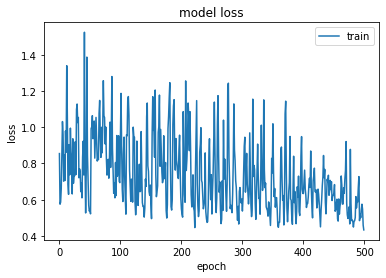

In [31]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train"], loc="upper right")
plt.show()

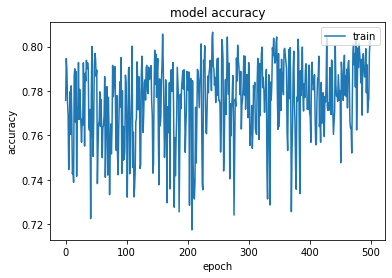

In [32]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train"], loc="upper right")
plt.show()